# Open Government Data, Canton Zurich

### **Dataset**: Open Government Data publizierende Verwaltungseinheiten und -abteilungen im Kanton Zürich

### **Description**: Liste aller Verwaltungseinheiten und -abteilungen (inkl. 'Publisher-Suffix' = URL-Slug der Organisation), die bis zum angegebenen Zeitpunkt offene Behördendaten (OGD) über die kantonale Metadatenverwaltung (MDV) publizieren. Davon ausgenommen sind Behörden, die ausschliesslich offene Geodaten publizieren, da diese nicht über die MDV bereitgestellt werden, sondern über die kantonale Geodateninfrastruktur (Geoinformation Kanton Zürich). Die Stadt Zürich als grösstes *kommunales* OGD-publizierendes Organ im Kanton ist ebenfalls ausgenommen, da sie über eine eigene OGD-Metadateninfrastruktur (Open Data Zürich) verfügt. Hinweis: Alle OGD, die über die MDV bereitgestellt werden, verfügen sowohl im öffentlichen kantonalen Datenkatalog (zh.ch/daten) wie auch im zentralen Portal für offene Daten der Schweizer Behörden (opendata.swiss) über eine permanente URL (Permalink): Das 'Publisher-Suffix' der Organisation, welche die Datenhoheit über die entsprechenden Daten hält, bildet zusammen mit einer numerischen ID den eindeutigen URL-Slug des Metadatensatzes.

*Autogenerated Jupyter Notebook and basic Python code for data set* **1641@statistisches-amt-kanton-zuerich**.

## Dataset profile
- **Issued** `2022-08-17T10:43:44`
- **Modified** `2023-01-06T12:24:28`
- **Startdate** `None`
- **Enddate** `2023-01-06`
- **Theme** `['Volkswirtschaft']`
- **Keyword** `['gemeinden', 'gemeindeverwaltung', 'kantonale_verwaltung', 'kanton_zuerich', 'stadtverwaltung', 'ogd']`
- **Publisher** `['Statistisches Amt des Kantons Zürich']`
- **Landingpage** `None`


## Import Python modules

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [13]:
# Distribution 0
# Ktzhdistid               : 3098
# Title                    : OGD-Publisher im Kanton Zürich
# Description              : NA
# Issued                   : 2022-08-17T10:43:44
# Modified                 : 2023-01-06T13:24:36
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceNotRequired

df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/data/kanton_zuerich_ogd_orgs.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/data/kanton_zuerich_ogd_orgs.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [14]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [15]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 38 rows (observations) and 3 columns (variables).
There seem to be 0 exact duplicates in the data.


In [16]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PUBLISHER         38 non-null     object
 1   ABTEILUNG         29 non-null     object
 2   PUBLISHER_SUFFIX  38 non-null     object
dtypes: object(3)
memory usage: 11.5 KB


In [17]:
df.head()

,PUBLISHER,ABTEILUNG,PUBLISHER_SUFFIX
0,"Amt für Abfall, Wasser, Energie und Luft des K...",Abteilung Abfallwirtschaft und Betriebe - Sekt...,awel-kanton-zuerich
1,"Amt für Abfall, Wasser, Energie und Luft des K...",Abteilung Energie,awel-kanton-zuerich
2,"Amt für Abfall, Wasser, Energie und Luft des K...","Abteilung Luft, Klima und Strahlung",awel-kanton-zuerich
3,Amt für Raumentwicklung des Kantons Zürich,Datenlogistik ZH,are-kanton-zuerich
4,Amt für Raumentwicklung des Kantons Zürich,Kantonale Denkmalpflege,are-kanton-zuerich


In [18]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,31,8,32
PUBLISHER,Statistisches Amt des Kantons Zürich,Fachstelle Open Government Data des Kantons Zü...,Statistisches Amt des Kantons Zürich
ABTEILUNG,Befragungen und Sozialhilfestatistik,NaN,Data Engineering
PUBLISHER_SUFFIX,statistisches-amt-kanton-zuerich,fachstelle-ogd-kanton-zuerich,statistisches-amt-kanton-zuerich


In [19]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,PUBLISHER,ABTEILUNG,PUBLISHER_SUFFIX
count,38,29,38
unique,19,29,19
top,Statistisches Amt des Kantons Zürich,Abteilung Abfallwirtschaft und Betriebe - Sekt...,statistisches-amt-kanton-zuerich
freq,6,1,6


In [20]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    try:
        display(df.describe(include='number'))
    except:
        pass

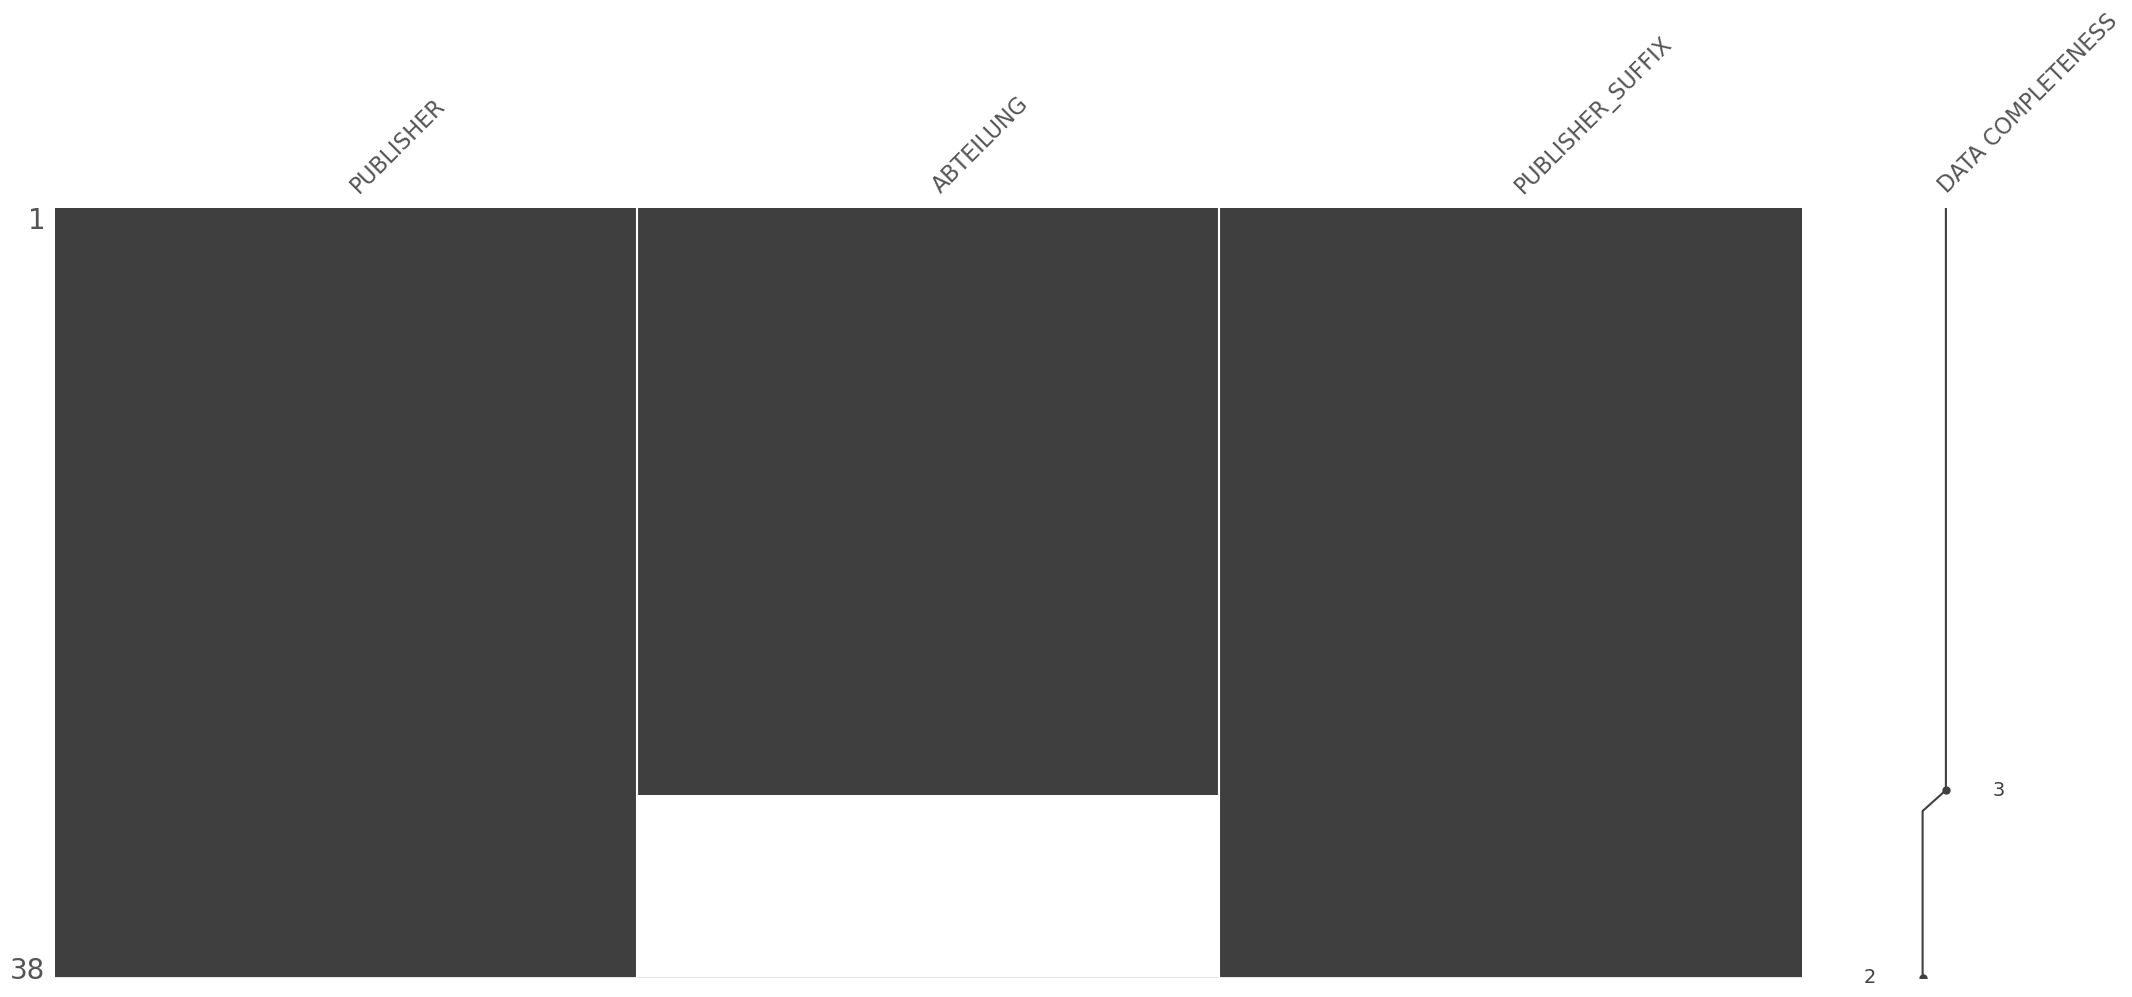

In [21]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

In [22]:
# plot a histogram for each numerical feature
try:
    df.hist(bins=25, layout=(-1, 5), edgecolor='black');
except:
    pass

In [23]:
# continue your code here...

**Contact**: Statistisches Amt des Kantons Zürich | Data Shop | datashop@statistik.zh.ch